In [4]:
import pylab as py
import numpy as np
import random as rn
import time
import scipy.special.cython_special
%run Jackknife.ipynb
pi = np.pi

In [16]:
def TotalFlux(Coords,FluxX, FluxY):
    return (FluxX[Coords] - FluxX[Coords[0],(Coords[1]-1)%L] + FluxY[Coords] - FluxY[(Coords[0]-1)%L,Coords[1]])
            
def AccRatio(mu,beta,L,Masha,FluxX, FluxY):
    if mu == 0:
        FluxIni = FluxX[Masha[0],Masha[1]]
    elif mu == 1:
        FluxIni = -FluxX[Masha[0],(Masha[1]-1)%L]
    elif mu == 2:
        FluxIni = - FluxY[(Masha[0]-1)%L,Masha[1]]
    elif mu == 3:
        FluxIni = FluxY[Masha[0],Masha[1]]
    FluxFin = FluxIni + 1 
        
    R = scipy.special.iv(FluxFin, beta, out=None)/scipy.special.iv(FluxIni, beta, out=None)          
    return R
            
def WA_sweep(L,beta,FluxX, FluxY, Masha):   
    mu = rn.randint(0, 3) #0 --> +x direction, 1 --> -x direction, 2 --> +y direction, 3 --> -y direction
    R = AccRatio(mu,beta,L,Masha,FluxX, FluxY)
    r = rn.random() #random number between zero and one  
    if r < R:
        if mu == 0: 
            FluxX[Masha[0], Masha[1]] += 1   #Create bond from Masha to the right site -->
            Masha[1] =  (Masha[1]+1) % L #move masha one site to the right           
        elif mu == 1: 
            FluxX[Masha[0],(Masha[1]-1) % L] -= 1  #Create bond from Masha to the left site <--
            Masha[1] =  (Masha[1]-1) % L #move masha one site to the left    
        elif mu == 2: 
            FluxY[(Masha[0]-1)%L, Masha[1]] -= 1 #Create bond from Masha to the site above         
            Masha[0] =  (Masha[0]-1) % L #move masha up   
        elif mu == 3: 
            FluxY[Masha[0], Masha[1]] += 1 #Create bond from Masha to the site below
            Masha[0] =  (Masha[0]+1) % L #move masha dowm
    return Masha, FluxX, FluxY

#-----Esta parte no es necesario cambiarla-----#
def WA_XY2d(beta,L,Ntherm,Nmeas,Nsteps):
    Ira = [rn.randint(0, L-1), rn.randint(0,L-1)] #randint(a,b) generates a random number r\in[a,b] (closed interval)
    Masha = [Ira[0],Ira[1]]
    FluxX, FluxY = np.zeros((L,L)), np.zeros((L,L))

    tau = 0.0
    TAU = []
    for i in range(Ntherm):
        if Masha == Ira:  
            Ira = [rn.randint(0, L-1), rn.randint(0,L-1)]
            Masha = [Ira[0],Ira[1]]
        Masha, FluxX, FluxY = WA_sweep(L,beta,FluxX, FluxY,Masha)
    count = 0
    while count<Nmeas:
        tau += 1
        if Masha == Ira:
            count += 1
            TAU.append(tau)
            Ira = [rn.randint(0, L-1), rn.randint(0,L-1)]
            Masha = [Ira[0],Ira[1]] 
            tau = 0.0
        Masha, FluxX, FluxY = WA_sweep(L,beta,FluxX, FluxY,Masha)
        for j in range(Nsteps):  
            if Masha == Ira:
                Ira = [rn.randint(0, L-1), rn.randint(0,L-1)]
                Masha = [Ira[0],Ira[1]] 
            Masha, FluxX, FluxY = WA_sweep(L,beta,FluxX, FluxY,Masha)
    TAU = np.array(TAU)
    chi = np.mean(TAU)
    dchi = Jerr(TAU,20) 
    return chi, dchi

In [ ]:
L, Ntherm, Nmeas, Nsteps = 24, 1000, 1000, 100 
beta = np.linspace(0.1,1.6,50)
Chi, dChi = [], []
for i in range(len(beta)):
    chi, dchi = WA_XY2d(beta[i],L,Ntherm,Nmeas,Nsteps)
    Chi.append(chi)
    dChi.append(dchi)
    print('i',i,'beta',beta[i],'T',1/beta[i])
    print('chi',chi,'+-',dchi)
    print('---------------------------')
dChi = np.array(dChi)
Chi = np.array(Chi)

i 0 beta 0.1 T 10.0
chi 1.21 +- 0.02033922836604953
---------------------------
i 1 beta 0.1306122448979592 T 7.656249999999999
chi 1.304 +- 0.01586787552523052
---------------------------
i 2 beta 0.16122448979591836 T 6.2025316455696204
chi 1.436 +- 0.027322633763776805
---------------------------
i 3 beta 0.19183673469387755 T 5.212765957446809
chi 1.553 +- 0.03613643736262825
---------------------------
i 4 beta 0.22244897959183674 T 4.495412844036697
chi 1.619 +- 0.03576163778187614
---------------------------
i 5 beta 0.25306122448979596 T 3.951612903225806
chi 1.737 +- 0.03974325497225251
---------------------------
i 6 beta 0.28367346938775506 T 3.525179856115108
chi 1.871 +- 0.03153861459427657
---------------------------
i 7 beta 0.3142857142857143 T 3.181818181818182
chi 2.124 +- 0.05147508339503978
---------------------------
i 8 beta 0.3448979591836735 T 2.8994082840236683
chi 2.368 +- 0.05740713324464497
---------------------------
i 9 beta 0.3755102040816326 T 2.66304347

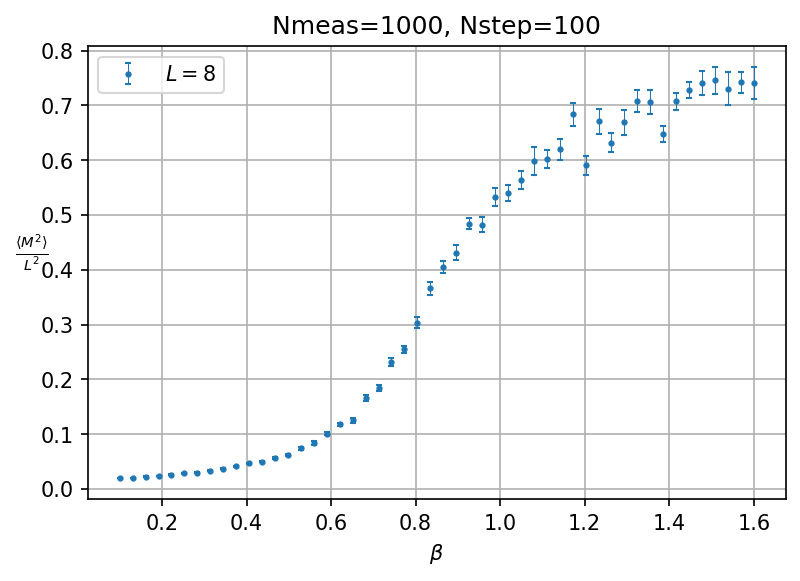

<Figure size 432x288 with 0 Axes>

In [28]:
fig = py.figure(dpi=150)
py.errorbar(beta,Chi/L**2,yerr=dChi/L**2,fmt='o',markersize='2',\
elinewidth=0.5,solid_capstyle='projecting', capsize=1.5,label=r'$L=${0}'.format(L))
py.title('Nmeas={0}, Nstep={1}'.format(Nmeas,Nsteps))
#py.axvline(x=2/np.log(1+np.sqrt(2)), color='k',linestyle='--',linewidth=0.5,label=r'$T_c=$2.2692')
py.xlabel(r'$\beta$')
py.ylabel(r'$\frac{\langle M^2 \rangle}{L^2}$',rotation=0)
py.legend()
py.grid()
py.show()
py.tight_layout()
fig.savefig('2dXY_Chi_L{0}_Nmeas{1}.pdf'.format(L,Nmeas))